# Exploration of AI Salaries

## Content
- Preparing Dataset 
- Linear Regression
- CatBoost
- Comparing Models
- Feature Importance Analysis

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn import linear_model
import catboost as cb

## Prepare Dataset

In [2]:
# Read Dataset and drop axes we don't need
df = pd.read_csv("salaries.csv")
df = df.drop('salary', axis = 1) 
df = df.drop('salary_currency', axis = 1)
df = df.drop('company_location', axis= 1)


# Just year 2022
df = df[df.work_year == 2022]

# Just the top 4 job titles, more than 100 entries each
df = df[df.job_title.isin(["Data Scientist", "Data Analyst", "Data Engineer", "Machine Learning Engineer"])]

# Just employee_residences with more than 49 entries in the dataset
df = df[df.employee_residence.isin(["ES","US","GB","CA","IN","DE"])]

# Just full-time, because there are almost no other 
df = df[df.employment_type == "FT"]

# Use this cols
df = df[[ "salary_in_usd", "experience_level", "remote_ratio", "company_size", "job_title", "employee_residence"]]

    
#save dataset to other csv
#df.to_csv("Salaries_edited.csv")

# make a copy for one hot encoding
df_oh = df.copy(deep = True)

# make one hot encoding
df_oh = pd.get_dummies(df_oh)

# Display first 5 rows
df[1030:1050]


salary_in_usd experience_level  remote_ratio company_size  \
1444         120000               SE             0            L   
1445         126500               MI             0            M   
1446         106260               MI             0            M   
1447         116000               SE             0            M   
1448          99000               SE             0            M   
1449         155000               SE           100            M   
1450         120600               SE           100            M   
1451         130000               MI             0            M   
1452          90000               MI             0            M   
1453         170000               MI           100            M   
1454         150000               MI           100            M   
1455         102100               SE           100            M   
1456          84900               SE           100            M   
1457         136620               SE           100            M   
1458          99360               SE           100            M   
1459         110885               SE             0            M   
1460          98565               SE             0            M   
1461         146000               SE           100            M   
1462         123000               SE           100            M   
1463          49282               EN           100            M   

           job_title employee_residence  
1444  Data Scientist                 US  
1445    Data Analyst                 US  
1446    Data Analyst                 US  
1447    Data Analyst                 US  
1448    Data Analyst                 US  
1449    Data Analyst                 US  
1450    Data Analyst                 US  
1451  Data Scientist                 US  
1452  Data Scientist                 US  
1453   Data Engineer                 US  
1454   Data Engineer                 US  
1455    Data Analyst                 US  
1456    Data Analyst                 US  
1457  Data Scientist                 US  
1458  Data Scientist                 US  
1459  Data Scientist                 GB  
1460  Data Scientist                 GB  
1461  Data Scientist                 US  
1462  Data Scientist                 US  
1463   Data Engineer                 GB

## Split Dataset

In [3]:
# Do the same for df and df_oh

# Target column
labels = np.array(df['salary_in_usd'])
labels_oh = np.array(df_oh['salary_in_usd'])

# Features columns
features = df.drop('salary_in_usd', axis = 1) 
features_oh = df_oh.drop('salary_in_usd', axis = 1) 

# List of feature column names
feature_list = ['Experience Level', 'Remote Ratio', 'Company Size', 'Job Title', 'Employee Residence']
feature_list_oh = list(features_oh.columns)

# convert into numpy array
features = np.array(features)
features_oh = np.array(features_oh)

# Split Dataset in 80% train and 20% test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, train_size = 0.8, random_state = 42)
train_features_oh, test_features_oh, train_labels_oh, test_labels_oh = train_test_split(features_oh, labels_oh, test_size = 0.2, train_size = 0.8, random_state = 42)

print(train_features.shape[1], " features are used to predict salary in USD")
print("There are ",train_features.shape[0], " datapoints for training")
print("There are",test_features.shape[0], " datapoints for testing")

5  features are used to predict salary in USD
There are  951  datapoints for training
There are 238  datapoints for testing


## Linear Regression

In [4]:
LR_oh = linear_model.LinearRegression()
LR_oh.fit(train_features_oh, train_labels_oh)
LR_predictions_oh = LR_oh.predict(test_features_oh)

## CatBoost

In [5]:
categorical_features_indices = [0,2,3,4]

train_dataset = cb.Pool(train_features, train_labels, cat_features=categorical_features_indices) 
test_dataset = cb.Pool(test_features, test_labels, cat_features=categorical_features_indices) 

#cb_model = cb.CatBoostRegressor(loss_function = "RMSE", one_hot_max_size = 0)

grid = {'iterations': [200, 400, 600],
        'learning_rate': [0.01, 0.03, 0.1],
        'depth': [4, 6, 8, 10]}


#grid_search_result = cb_model.grid_search(grid, train_dataset)

#print(grid_search_result['params'])

In [6]:
cb_final = cb.CatBoostRegressor(loss_function = "RMSE", 
                                one_hot_max_size = 0,
                                iterations = 600,
                                learning_rate = 0.1,
                                depth = 4)


cb_final.fit(train_dataset)
cb_predictions = cb_final.predict(test_dataset)


0:	learn: 51981.4090604	total: 158ms	remaining: 1m 34s
1:	learn: 50860.2956469	total: 169ms	remaining: 50.6s
2:	learn: 49849.1265198	total: 180ms	remaining: 35.8s
3:	learn: 48978.7966956	total: 190ms	remaining: 28.3s
4:	learn: 48312.5465878	total: 198ms	remaining: 23.6s
5:	learn: 47765.5968515	total: 208ms	remaining: 20.6s
6:	learn: 47264.4282657	total: 218ms	remaining: 18.5s
7:	learn: 46857.4129590	total: 228ms	remaining: 16.9s
8:	learn: 46586.3744712	total: 238ms	remaining: 15.6s
9:	learn: 46349.2448411	total: 249ms	remaining: 14.7s
10:	learn: 45948.1476591	total: 261ms	remaining: 14s
11:	learn: 45647.9864523	total: 272ms	remaining: 13.3s
12:	learn: 45365.9893055	total: 282ms	remaining: 12.7s
13:	learn: 45101.2588953	total: 293ms	remaining: 12.3s
14:	learn: 44883.7385782	total: 303ms	remaining: 11.8s
15:	learn: 44700.4180081	total: 313ms	remaining: 11.4s
16:	learn: 44563.0995052	total: 323ms	remaining: 11.1s
17:	learn: 44474.5663128	total: 333ms	remaining: 10.8s
18:	learn: 44355.6526

164:	learn: 40951.7605779	total: 1.9s	remaining: 5.01s
165:	learn: 40943.8355297	total: 1.91s	remaining: 5s
166:	learn: 40930.5219598	total: 1.92s	remaining: 4.98s
167:	learn: 40918.5509818	total: 1.93s	remaining: 4.96s
168:	learn: 40900.2667289	total: 1.94s	remaining: 4.95s
169:	learn: 40899.8083043	total: 1.95s	remaining: 4.93s
170:	learn: 40897.7328952	total: 1.96s	remaining: 4.92s
171:	learn: 40886.3901235	total: 1.97s	remaining: 4.9s
172:	learn: 40826.6445924	total: 1.98s	remaining: 4.89s
173:	learn: 40817.0497615	total: 1.99s	remaining: 4.88s
174:	learn: 40807.9617390	total: 2s	remaining: 4.86s
175:	learn: 40804.2504841	total: 2.01s	remaining: 4.84s
176:	learn: 40797.9170403	total: 2.02s	remaining: 4.83s
177:	learn: 40790.0501392	total: 2.03s	remaining: 4.82s
178:	learn: 40789.8598818	total: 2.04s	remaining: 4.8s
179:	learn: 40781.6205409	total: 2.05s	remaining: 4.78s
180:	learn: 40777.5468180	total: 2.06s	remaining: 4.77s
181:	learn: 40775.4345489	total: 2.07s	remaining: 4.75s
1

317:	learn: 39399.2699864	total: 3.48s	remaining: 3.08s
318:	learn: 39396.2024371	total: 3.49s	remaining: 3.07s
319:	learn: 39383.3140989	total: 3.5s	remaining: 3.06s
320:	learn: 39375.3538321	total: 3.51s	remaining: 3.05s
321:	learn: 39370.2858266	total: 3.52s	remaining: 3.04s
322:	learn: 39369.8941796	total: 3.53s	remaining: 3.02s
323:	learn: 39368.4742732	total: 3.54s	remaining: 3.01s
324:	learn: 39361.0296810	total: 3.55s	remaining: 3s
325:	learn: 39353.2573670	total: 3.56s	remaining: 2.99s
326:	learn: 39342.5307062	total: 3.57s	remaining: 2.98s
327:	learn: 39331.1123841	total: 3.58s	remaining: 2.97s
328:	learn: 39328.0811041	total: 3.59s	remaining: 2.96s
329:	learn: 39325.1301582	total: 3.6s	remaining: 2.94s
330:	learn: 39316.4902772	total: 3.61s	remaining: 2.93s
331:	learn: 39299.7070003	total: 3.62s	remaining: 2.92s
332:	learn: 39293.4730639	total: 3.63s	remaining: 2.91s
333:	learn: 39277.9068868	total: 3.64s	remaining: 2.9s
334:	learn: 39268.5301250	total: 3.65s	remaining: 2.88

469:	learn: 38332.4339944	total: 5.04s	remaining: 1.39s
470:	learn: 38313.7700489	total: 5.05s	remaining: 1.38s
471:	learn: 38312.5180783	total: 5.07s	remaining: 1.37s
472:	learn: 38311.6053903	total: 5.08s	remaining: 1.36s
473:	learn: 38304.4525536	total: 5.08s	remaining: 1.35s
474:	learn: 38289.7422496	total: 5.09s	remaining: 1.34s
475:	learn: 38284.2671193	total: 5.11s	remaining: 1.33s
476:	learn: 38264.1446777	total: 5.12s	remaining: 1.32s
477:	learn: 38257.5763125	total: 5.13s	remaining: 1.31s
478:	learn: 38246.8441558	total: 5.14s	remaining: 1.3s
479:	learn: 38245.6443549	total: 5.15s	remaining: 1.29s
480:	learn: 38241.7596559	total: 5.16s	remaining: 1.28s
481:	learn: 38233.0905689	total: 5.17s	remaining: 1.26s
482:	learn: 38232.4816638	total: 5.18s	remaining: 1.25s
483:	learn: 38227.4603687	total: 5.19s	remaining: 1.24s
484:	learn: 38225.1588499	total: 5.2s	remaining: 1.23s
485:	learn: 38223.5686476	total: 5.21s	remaining: 1.22s
486:	learn: 38221.6906731	total: 5.22s	remaining: 

## Comparing Models

In [7]:
# calculate RMSE and MAE for different Models    

# Linear Regression
rmse_error_LR_oh = int(mse(test_labels, LR_predictions_oh, squared = False))
mae_error_LR_oh = int(mae(test_labels, LR_predictions_oh)) 

# CatBoost not one hot
rmse_error_cb = int(mse(test_labels, cb_predictions, squared = False))
mae_error_cb = int(mae(test_labels, cb_predictions)) 

print("Linear Regression with one hot data has a MAE of ", mae_error_LR_oh , " and a RMSE of ", rmse_error_LR_oh)
print("CatBoost has a MAE of ", mae_error_cb , " and a RMSE of ", rmse_error_cb)

Linear Regression with one hot data has a MAE of  29483  and a RMSE of  40520
CatBoost has a MAE of  28247  and a RMSE of  39600


## Feature Importance Analyse

#### CatBoost

In [8]:
cb_importances = list(cb_final.get_feature_importance(test_dataset , type = "PredictionValuesChange")) # "LossFunctionChange" PredictionValuesChange
cb_feature_importances = [(feature, int(round(impos, 0))) for feature, impos in zip(feature_list, cb_importances)]
cb_feature_importances = sorted(cb_feature_importances, key = lambda x: x[1], reverse = True)

print("Feature Importance for CatBoost")
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in cb_feature_importances];


Feature Importance for CatBoost
Variable: Employee Residence   Importance: 40
Variable: Job Title            Importance: 28
Variable: Experience Level     Importance: 25
Variable: Company Size         Importance: 4
Variable: Remote Ratio         Importance: 2


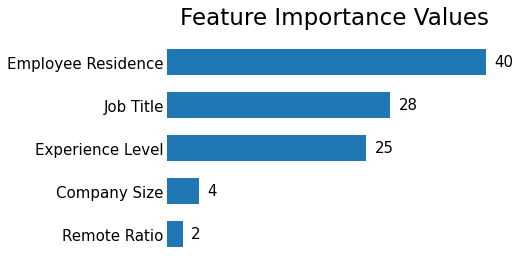

In [32]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cb_labels = np.flip([x[0] for x in cb_feature_importances])
cb_sizes = np.flip([x[1] for x in cb_feature_importances])

fig, ax = plt.subplots()
bars = ax.barh(cb_labels, cb_sizes, height = 0.6)

#bars = plt.barh(cb_labels, cb_sizes, height = 0.6)
plt.title("Feature Importance Values", fontsize = 23, pad = 15)
plt.yticks(fontsize=15)
plt.xticks([])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.box(False)
for bars in ax.containers:
    plt.bar_label(bars, padding=8, fontsize = 15)
plt.savefig("Importance_Values.pdf", bbox_inches="tight")
plt.show()